In [2]:
# https://www.kaggle.com/code/georgesaavedra/best-covid-19-forecasting-in-us-uk-and-chile

import pandas as pd
import matplotlib.pyplot as plt
import math
plt.style.use('fivethirtyeight')
import numpy as np

In [3]:
data=pd.read_csv('owid-covid-data.csv')
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [97]:
list(data.columns)

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'peo

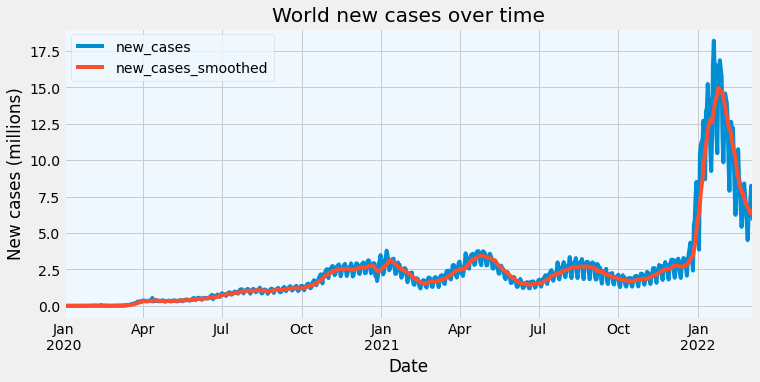

In [110]:
data2 = data.copy()
data2.date = pd.to_datetime(data2['date'])
data2 = data2.groupby('date').sum()
data2['new_cases'] = data2['new_cases']/1e6
data2['new_cases_smoothed'] = data2['new_cases_smoothed']/1e6
data2[['new_cases','new_cases_smoothed']].plot(figsize = (11, 5), alpha = 1)

plt.title('World new cases over time')
plt.xlabel('Date')
plt.ylabel('New cases (millions)')
plt.rcParams['axes.facecolor'] = '#F0F8FF'

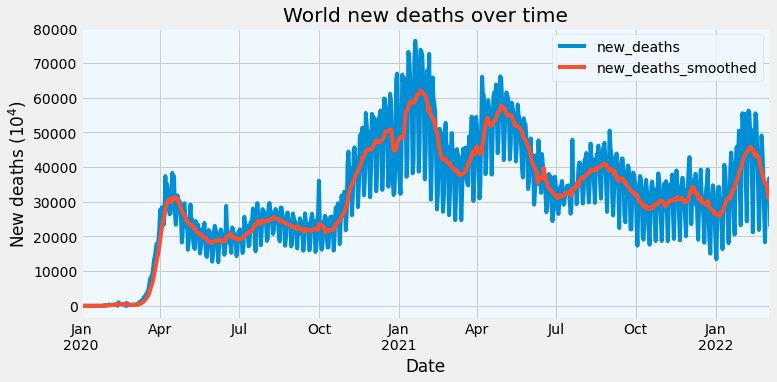

In [111]:
data2 = data.copy()
data2.date = pd.to_datetime(data2['date'])
data2 = data2.groupby('date').sum()
data2['new_deaths'] = data2['new_deaths']
data2['new_deaths_smoothed'] = data2['new_deaths_smoothed']
data2[['new_deaths','new_deaths_smoothed']].plot(figsize = (11, 5), alpha = 1)
plt.title('World new deaths over time')
plt.xlabel('Date')
plt.ylabel('New deaths ($10^4$)')
plt.rcParams['axes.facecolor'] = '#F0F8FF'

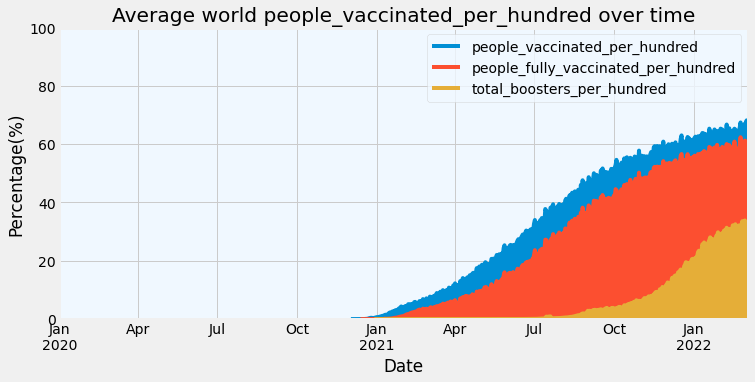

In [160]:
data2 = data.copy()
data2.date = pd.to_datetime(data2['date'])
data2 = data2.groupby('date').mean()
data2['people_vaccinated_per_hundred'] = data2['people_vaccinated_per_hundred']
data2['people_fully_vaccinated_per_hundred'] = data2['people_fully_vaccinated_per_hundred']
data2['total_boosters_per_hundred'] = data2['total_boosters_per_hundred']
data2[['people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','total_boosters_per_hundred']].plot(figsize = (11, 5), alpha = 1)
plt.fill_between(data2.index, data2.people_vaccinated_per_hundred)
plt.fill_between(data2.index, data2.people_fully_vaccinated_per_hundred)
plt.fill_between(data2.index, data2.total_boosters_per_hundred)
plt.title('Average world people_vaccinated_per_hundred over time')
plt.xlabel('Date')
plt.ylabel('Percentage(%)')
plt.ylim([0,100])
plt.rcParams['axes.facecolor'] = '#F0F8FF'

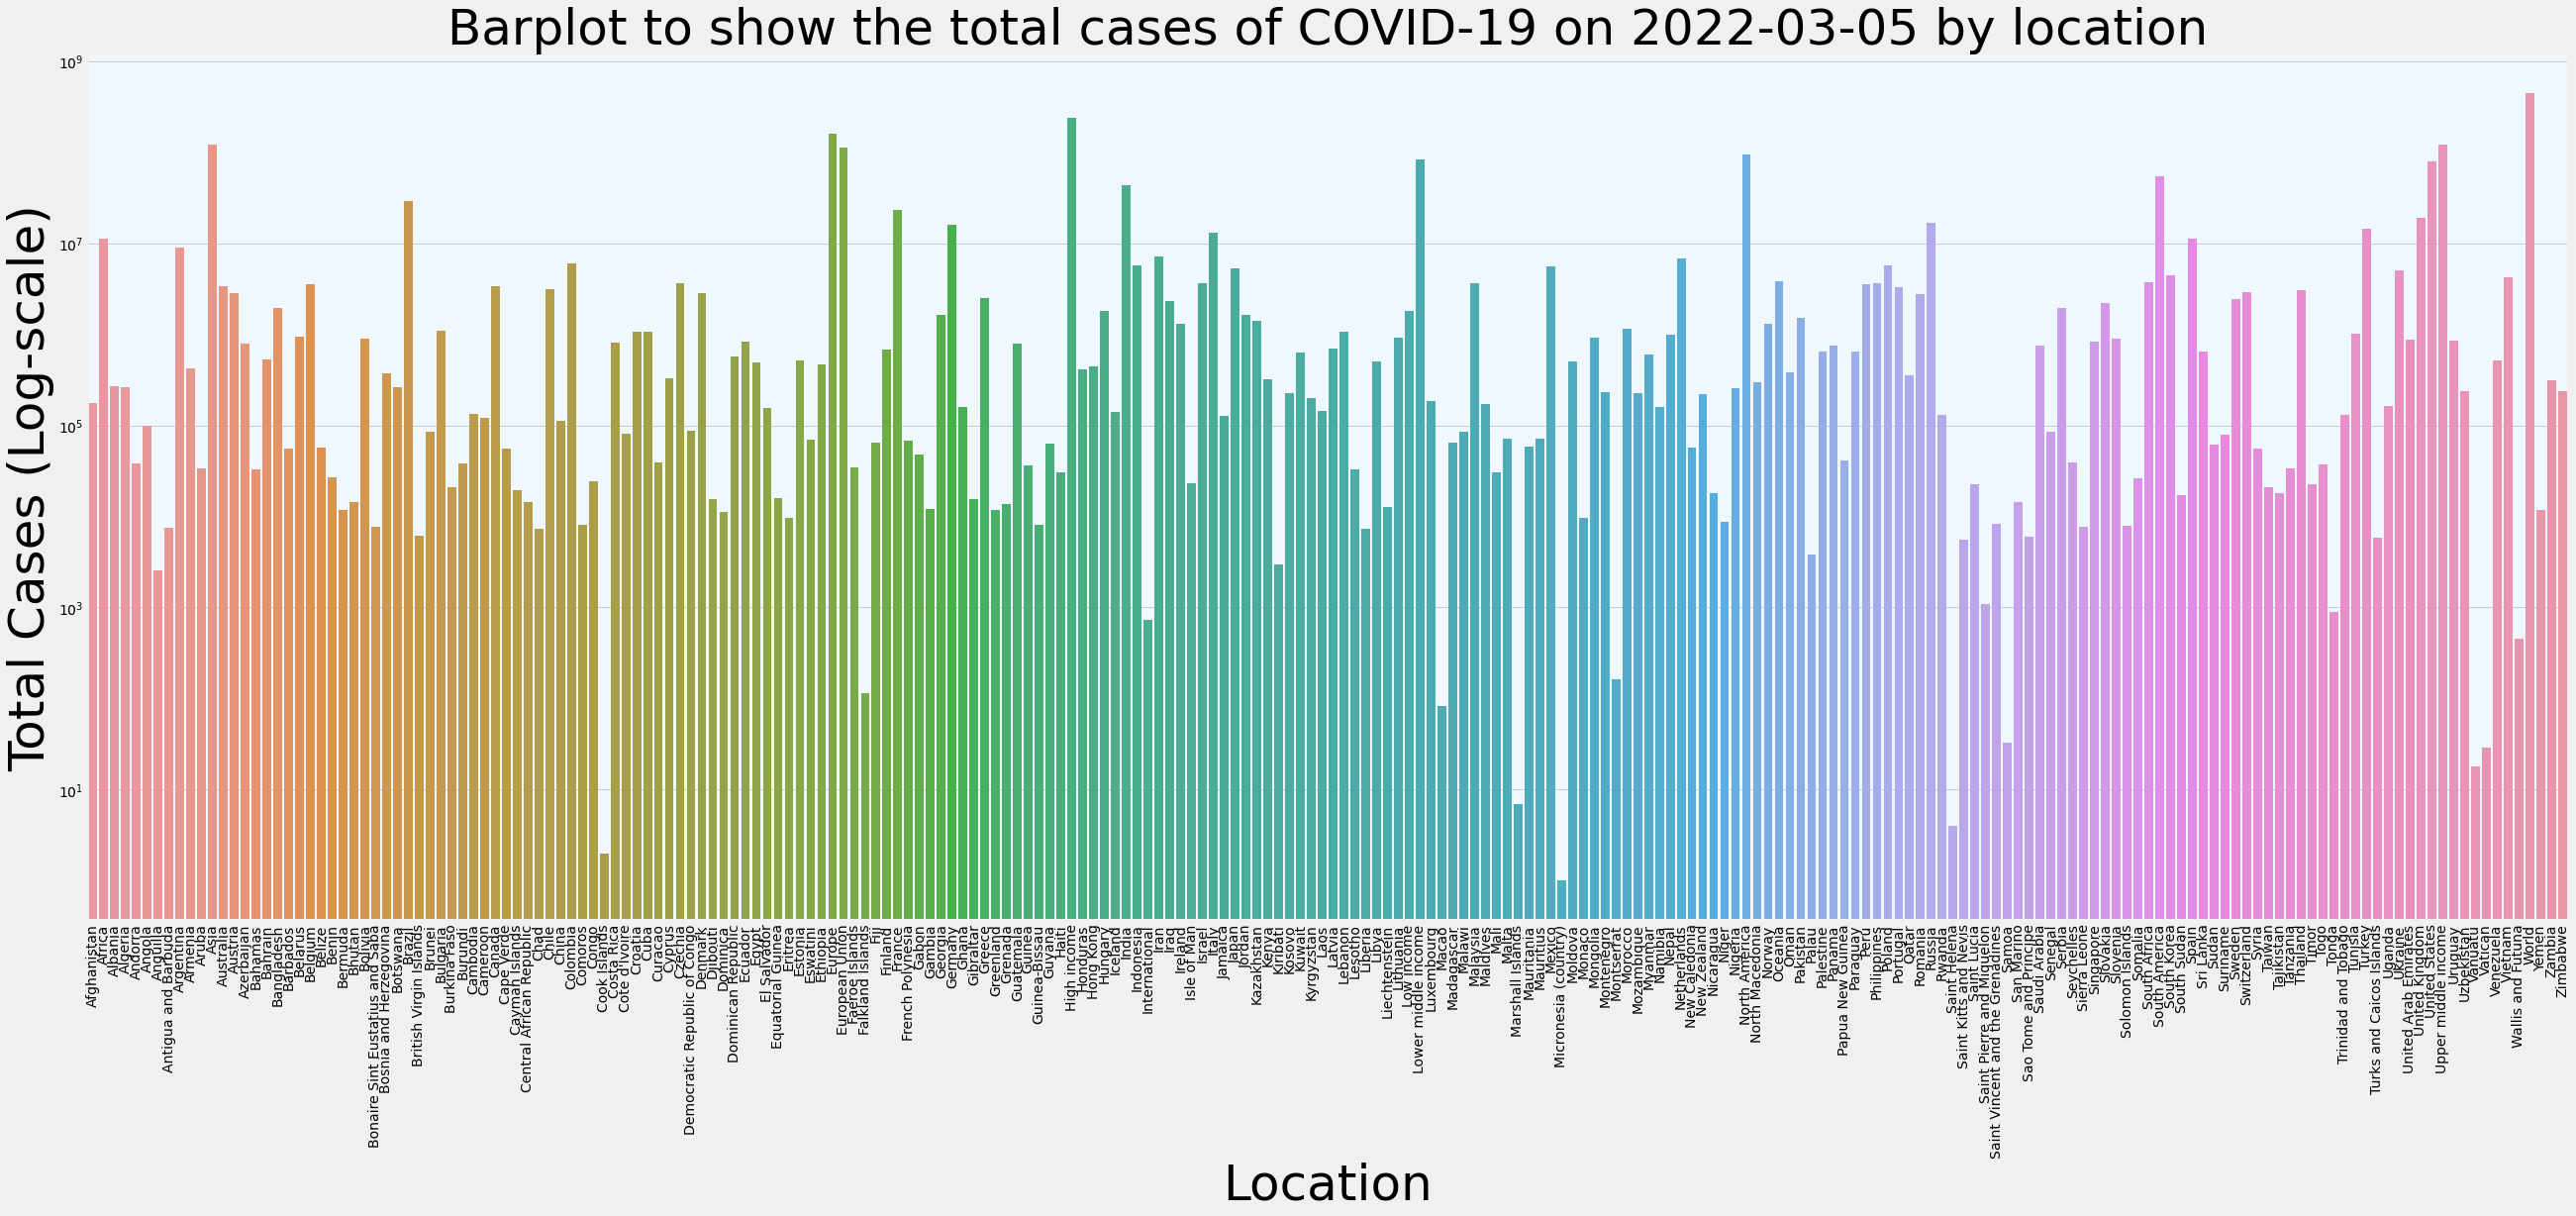

In [50]:
import seaborn as sns
# Seaborn barchart : x = location, y = total cases
# Too many bars with all rows of data, filter it to only latest total_case value by date, one entry per location this way.
temp_data = data[data['date'] == "2022-03-05"]

# Initiate figure and plot
fig, ax = plt.subplots(figsize = (40,15))
ax = sns.barplot(x='location', y='total_cases',data=temp_data)

# Axis and formatting
ax.set_title("Barplot to show the total cases of COVID-19 on 2022-03-05 by location", fontsize = 50)
ax.set_xlabel("Location", fontsize = 50)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_ylabel("Total Cases (Log-scale)", fontsize = 50)
ax.set_yscale("log")

In [153]:
def create_and_plot_df(df, country):
    #Selecting the 7 key columns for country in dataset
    df=df[df['location']==country].copy()
    df=df[['date','new_cases_smoothed','new_cases',
         'new_deaths_smoothed','new_deaths',
         'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
         'new_deaths_per_million', 'new_cases_per_million']].copy()

    #Convert to datetime
    df.date = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
  
    #Plot new cases, new deaths and people vaccinated 
    df[['new_cases', 'new_cases_smoothed']].plot(figsize = (15, 5), alpha = 1)
    plt.title(f'Timeline new cases in {country}')
    plt.rcParams['axes.facecolor'] = '#F0F8FF'
    
    df[['new_deaths', 'new_deaths_smoothed']].plot(figsize = (15, 5), alpha = 1)
    plt.title(f'Timeline new deaths in {country}')
    plt.rcParams['axes.facecolor'] = '#F0F8FF'
    
    df[['people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred']].plot(figsize = (15, 5), alpha = 1)
    plt.ylim([0,100])
    plt.fill_between(df.index, df.people_vaccinated_per_hundred)
    plt.fill_between(df.index, df.people_fully_vaccinated_per_hundred)
    plt.title(f'Timeline percentage of people vaccinated in {country}')
    plt.rcParams['axes.facecolor'] = '#F0F8FF'
  
    #Return the dataframe processed
    return df

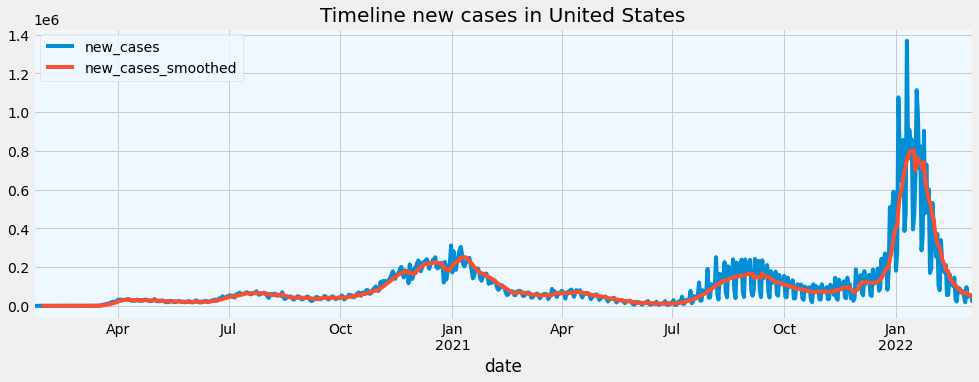

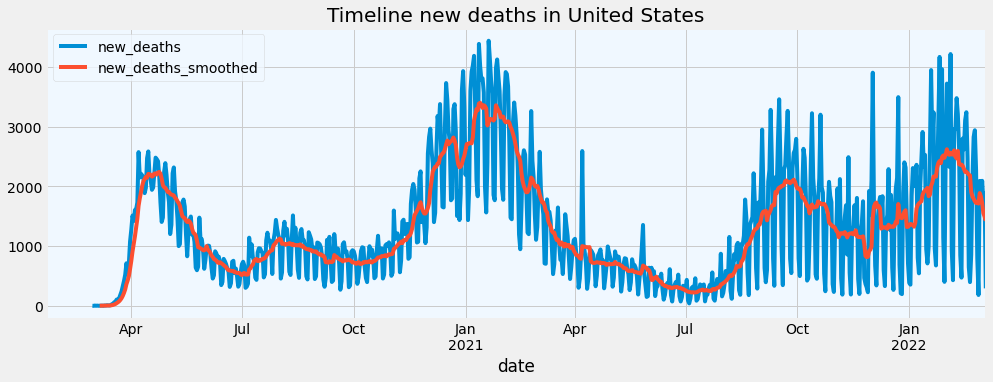

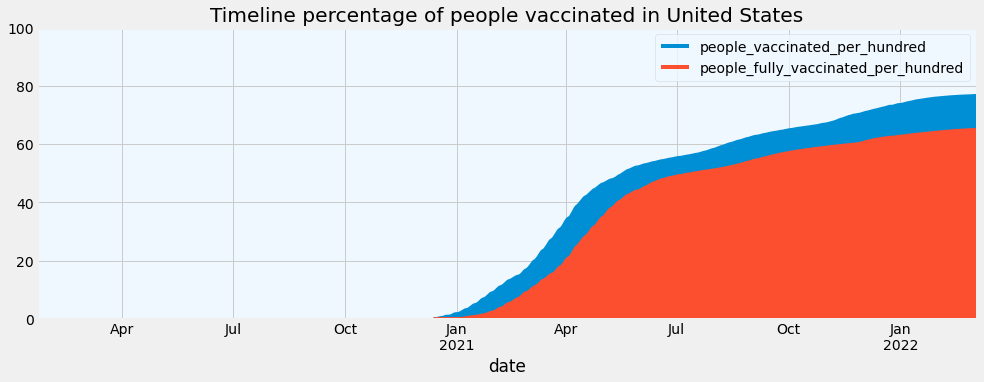

In [154]:
df_us=create_and_plot_df(data, 'United States')

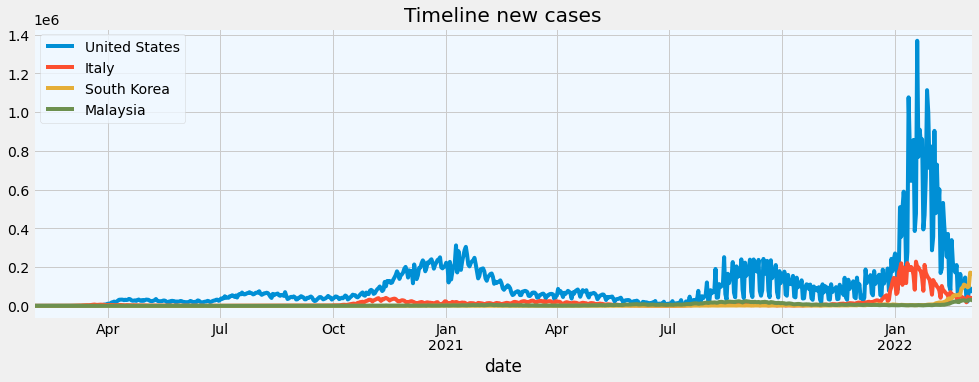

In [40]:
#Selecting the 7 key columns for country in dataset
df_us=data[data['location']=='United States']['new_cases'].copy()
df_i=data[data['location']=='Italy']['new_cases'].copy()
df_sk=data[data['location']=='South Korea']['new_cases'].copy()
df_m=data[data['location']=='Malaysia']['new_cases'].copy()

df=data[data['location']=='Italy'].copy()
#Convert to datetime
df.date = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df['United States'] = np.array(df_us[:len(df.index)])
df['Italy'] = np.array(df_i[:len(df.index)])
df['South Korea'] = np.array(df_sk[:len(df.index)])
df['Malaysia'] = np.array(df_m[:len(df.index)])

#Plot new cases, new deaths and people vaccinated 
df[['United States', 'Italy','South Korea','Malaysia',]].plot(figsize = (15, 5), alpha = 1)
plt.title(f'Timeline new cases')
plt.rcParams['axes.facecolor'] = '#F0F8FF'



In [45]:
data['date'].unique()

array(['2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27',
       '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02',
       '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
       '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10',
       '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
       '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18',
       '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22',
       '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
       '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30',
       '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03',
       '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07',
       '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11',
       '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15',
       '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19',
       '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23',
       '2020-04-24', '2020-04-25', '2020-04-26', '2020-

In [14]:
df_us=data[data['location']=='United States']['new_cases'].copy()
df_i=data[data['location']=='Italy']['new_cases'].copy()
df_sk=data[data['location']=='South Korea']['new_cases'].copy()
df_m=data[data['location']=='Malaysia']['new_cases'].copy()